In [2]:
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

%matplotlib inline

# Import the datasets via the read_json method from pandas
pizza_data_train = pd.read_json('../data/train.json')
pizza_data_test = pd.read_json('../data/test.json')

# Analyze the size of the datasets
print "Shape of training data:" + str(pizza_data_train.shape)
print "Shape of test data:" + str(pizza_data_test.shape)


Shape of training data:(4040, 32)
Shape of test data:(1631, 17)


In [25]:
from sklearn.cross_validation import train_test_split
#np.random.seed(1337)
vectorizer = CountVectorizer(binary = True)
#X = vectorizer.fit_transform(pizza_data_train['request_title'] + '_' + pizza_data_train['request_text_edit_aware'])
X = vectorizer.fit_transform(pizza_data_train['request_text_edit_aware'])
X = np.array(X.sum(axis=1))
y = np.array(pizza_data_train['requester_received_pizza'])

#X_positive = X[y]
#y_positive = y[y]
#X_negative = X[np.logical_not(y)]
#y_negative = y[np.logical_not(y)]

#old_X = X
#old_y = y

#(X_negative, X_negative_remainder, y_negative, y_negative_remainder) = \
#    train_test_split(X_negative, y_negative, train_size=len(X_positive))

#X = np.concatenate((X_positive, X_negative))
#y = np.concatenate((y_positive, y_negative))

#(X_train, X_test, y_train, y_test) = \
#    train_test_split(X, y, train_size=0.75)

In [49]:
lengthFilter = X <= 0
print "Number of records with small length: %d" % len(X[lengthFilter])
print "Number of positive records with small length: %d" % y[lengthFilter.reshape(-1)].sum()
pizza_data_train[(X == 0).reshape(-1)].to_csv("zero_length_records.csv", encoding='utf-8')

Number of records with small length: 110
Number of positive records with small length: 22


DescribeResult(nobs=1988, minmax=(array([6]), array([363])), mean=array([ 64.48591549]), variance=array([ 1516.08888054]), skewness=array([ 1.90711241]), kurtosis=array([ 6.17266542]))
DescribeResult(nobs=1988, minmax=(array([ 1.79175947]), array([ 5.89440283])), mean=array([ 4.00495317]), variance=array([ 0.33587369]), skewness=array([-0.2739928]), kurtosis=array([ 0.62195857]))


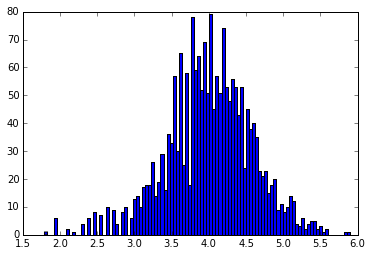

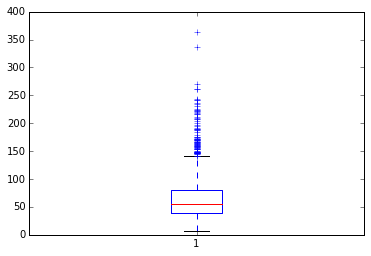

(array([ 792.25950483]), array([  2.60012537e-174]))


In [228]:
from sklearn.feature_selection import chi2
log_X = np.log(X)

print sp.stats.describe(X)
print sp.stats.describe(log_X)
plt.hist(log_X, bins=100)
plt.show()

plt.boxplot(X)
plt.show()

print chi2(np.array(X).reshape((len(X), 1)), y)

Excellent! The above results tell us that there is a strong relationship between the sums of the documents and y. Let's see if we can predict y with the sums now :)

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(n_estimators=100)
print clf
clf.fit(X_train, y_train)
print clf.score(X_train, y_train)
print clf.score(X_test, y_test)


y_pred = clf.predict(X_test)
print confusion_matrix(y_test, y_pred)






RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)
0.63313212609
0.521126760563
[[138 100]
 [138 121]]


In [230]:
clf.fit(X, y)
X_real_test = vectorizer.fit_transform(pizza_data_test['request_title'] + '_' + pizza_data_test['request_text_edit_aware'])
X_real_test = X_real_test.sum(axis=1)
y_real_pred = clf.predict(X_real_test)
print y_real_pred.sum() / float(len(y_real_pred))



0.446965052115


In [231]:
pizza_data_test['requester_received_pizza'] = y_real_pred.astype(int)
pizza_data_test.to_csv('../results.csv', columns=['request_id', 'requester_received_pizza'], index=False)
